# Simple Amino acid eval 

imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


grab experimental data and numerical data

In [2]:
df_num_data = pd.read_csv("simple_amino.csv")
df_exp_data = pd.read_csv("single_mut_effects.csv")

quick look at the data frames

In [3]:
df_exp_data.describe()

,site_RBD,site_SARS2,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
count,4221.000000,4221.000000,3994.000000,3991.000000,4003.000000,4183.000000,4184.000000,4198.000000
mean,101.000000,431.000000,-0.920441,-0.968637,-0.943600,-1.203875,-1.166883,-1.184726
std,58.029858,58.029858,1.389299,1.412122,1.391609,1.273002,1.233323,1.243281
min,1.000000,331.000000,-4.760000,-4.840000,-4.840000,-4.710000,-4.650000,-4.650000
25%,51.000000,381.000000,-1.080000,-1.230000,-1.140000,-2.200000,-2.120000,-2.150000
50%,101.000000,431.000000,-0.255000,-0.300000,-0.280000,-0.740000,-0.730000,-0.740000
75%,151.000000,481.000000,-0.040000,-0.050000,-0.050000,-0.125000,-0.140000,-0.140000
max,201.000000,531.000000,0.360000,0.380000,0.300000,0.920000,1.000000,0.990000


simple amino acids are those starting with single letter codes defined below:

D_amino = ["V", "I", "L", "M" , "F", "Y", "W"]

In [4]:
df_num_data.describe()

,Unnamed: 0,delta_delta_g_gen,delta_delta_g_gen_error,delta_delta_g_gen_66,delta_delta_g_gen_66_error
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,31.000000,-0.711097,0.139516,-0.539654,0.579494
std,18.330303,2.134639,0.329657,1.838006,0.897401
min,0.000000,-10.879800,0.000100,-8.891100,0.071700
25%,15.500000,-0.039700,0.000650,-0.037300,0.095750
50%,31.000000,-0.000800,0.004400,0.001300,0.135700
75%,46.500000,0.003450,0.050100,0.007350,0.469350
max,62.000000,0.059100,1.504500,0.356100,3.265400


notes on the numerical data:

$\Delta \Delta G$ calc is defined as wildtype - mutation. 

e.g. see F515A:
DELTA TOTAL_wild = -69.7344 
DELTA TOTAL_mut  = -69.7336
DELTA DELTA G binding = -0.0008

In [5]:
DELTA_TOTAL_wild = -69.7344 
DELTA_TOTAL_mut  = -69.7336
DELTA_TOTAL_wild- DELTA_TOTAL_mut

-0.0007999999999981355

get the indices for our mutants 

In [6]:
num_muts = df_num_data["mutations"]
exp_muts_np = df_exp_data["mutation"].to_numpy()
idx= []  
for mut in num_muts : 
    idx.append(np.where(exp_muts_np == mut )[0][0] ) 

check the mutations: 

uncomment below to double check

In [7]:
#exp_muts_np[idx], num_muts.to_numpy()

## Data evalutation: 

finding delta_G_deg from paper: 

In [8]:
R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
T =298  #room temp  
K_D_app = 3.9*1e-11 #from paper 

#note we should get -R*T* (-np.log(K_D_app)) as we have a K_D and not a K_a
#the double neg is removed here. 
delta_g_deg = R * T * np.log(K_D_app)
delta_g_deg

-14.141759785560145

try using bind_avg column in the exp data frame 

In [9]:
site_SARS2_val = df_exp_data.iloc[idx]["bind_avg"].to_numpy()

### first method:


$$\Delta log_{10}(K_{D,app}) = log_{10}(K_{mutation}) - log_{10}(K_{D,app}) $$
$$given \_ value := \Delta log_{10}(K_{D,app})$$
$$10^{given\_ value} = K_{mutation}/K_{D,app}$$
$$ K_{mutation} =10^{given \_ value} * K_{D,app} $$

note: this is with the idea of mut - wildtype, which is not present in our numerical data, to make this convertion it just becomes 
$$\Delta log_{10}(K_{D,app}) = log_{10}(K_{D,app}) - log_{10}(K_{mutation})$$
$$ K_{mutation} =10^{- given \_ value} * K_{D,app} $$

but converting out numerical result to mut - wildtype is easier
$$\Delta \Delta G_{w-m} = - \Delta \Delta G_{m-w} $$
so we will do that 

In [10]:
#using GB66
num_66 = - df_num_data["delta_delta_g_gen_66"].to_numpy()

In [11]:
tmp_K_mut = 10**(site_SARS2_val) * K_D_app
#- sign due to K_d and not K_a 
delta_g_first_method = -R * T * np.log(tmp_K_mut)
delta_g_first_method 

array([14.68520671, 15.31017067, 14.60368967, 14.83465461, 14.5357588 ,
       20.66312287, 17.08995934, 17.33451046, 14.22327682, 14.08741509,
       15.03844721, 15.28299832, 14.35913855, 15.4460324 , 17.48395836,
       14.65803436, 15.90796229, 15.50037709, 14.08741509, 14.68520671,
       14.78030992, 20.66312287, 19.34526408, 17.44319984, 15.11996425,
       14.1825183 , 14.29120769, 15.32375684, 14.54934498, 14.20969065,
       15.16072277, 14.16893213, 15.96230698, 16.28837513, 13.99231188,
       18.2719564 , 15.45961857, 15.48679092, 14.49500029, 15.26941215,
       14.19610448, 17.10354552, 14.943344  , 15.26941215, 18.40781813,
       15.20148129, 16.72313267, 14.15534596, 15.32375684, 15.02486104,
       20.41857175, 15.07920573, 14.236863  , 15.06561956, 14.25044917,
       15.31017067, 14.26403534, 14.50858646, 14.5357588 , 19.65774606,
       14.10100127, 14.07382892, 16.12534106])

### $\Delta \Delta G$ calc

$$\Delta \Delta G =\Delta G \degree +R T ln(K_{mutation})$$

In [12]:
del_del_g_total =   delta_g_deg + delta_g_first_method  #i think signs are right here: 
del_del_g_total

array([ 0.54344692,  1.16841089,  0.46192988,  0.69289483,  0.39399902,
        6.52136308,  2.94819956,  3.19275067,  0.08151704, -0.05434469,
        0.89668742,  1.14123854,  0.21737877,  1.30427262,  3.34219858,
        0.51627458,  1.7662025 ,  1.35861731, -0.05434469,  0.54344692,
        0.63855013,  6.52136308,  5.20350429,  3.30144006,  0.97820446,
        0.04075852,  0.1494479 ,  1.18199706,  0.40758519,  0.06793087,
        1.01896298,  0.02717235,  1.82054719,  2.14661535, -0.1494479 ,
        4.13019662,  1.31785879,  1.34503114,  0.3532405 ,  1.12765237,
        0.05434469,  2.96178573,  0.80158421,  1.12765237,  4.26605835,
        1.0597215 ,  2.58137289,  0.01358617,  1.18199706,  0.88310125,
        6.27681196,  0.93744594,  0.09510321,  0.92385977,  0.10868938,
        1.16841089,  0.12227556,  0.36682667,  0.39399902,  5.51598627,
       -0.04075852, -0.06793087,  1.98358127])

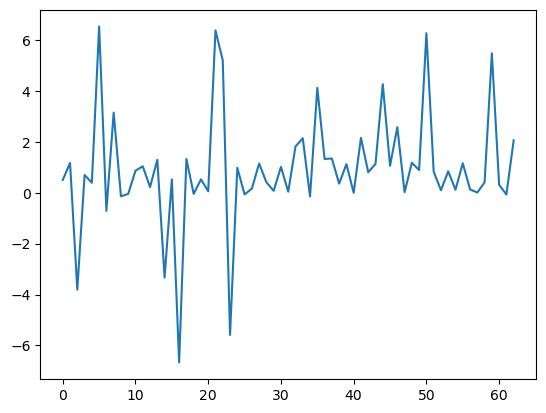

In [13]:
error_first_method = del_del_g_total - num_66
plt.plot(error_first_method)

function for this:


In [34]:
def delta_delta_G_exp_cal_frist_method(site_SARS2_val ) :
    R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
    T =298  #room temp  
    K_D_app = 3.9*1e-11 #from paper
    
    delta_g_deg = R * T * np.log(K_D_app)
    
    tmp_K_mut = 10**(site_SARS2_val) * K_D_app
    delta_g_first_method = -R * T * np.log(tmp_K_mut)
    del_del_g_total =   delta_g_deg + delta_g_first_method
    return del_del_g_total

In [14]:
num_muts

0     Y508A
1     V341A
2     F486A
3     L387A
4     F374A
      ...  
58    Y365A
59    L492A
60    F490A
61    L452A
62    I418A
Name: mutations, Length: 63, dtype: object

get indexes based on mutation and site


In [86]:
simple_amino = ["V", "I", "L", "M", "F", "Y", "W"]
sorted_dict = {} 
for letter_key in simple_amino :
    #get index mutations starting with letter_key 
    dftemp = df_num_data[ \
        df_num_data["mutations"].str.startswith(letter_key) ].iloc[:,0]
    
    #get mutations from the index
    mut_names = exp_muts_np[idx][dftemp.to_numpy()]
    #sort by binding site 
    site_values = np.array([site[1:-1] for site in mut_names])
    idx_sort = site_values.argsort()
    
    if len(dftemp.to_numpy()[idx_sort]):
        sorted_dict[letter_key] = dftemp.to_numpy()[idx_sort], site_values[idx_sort]
    
#sorted_dict



In [128]:
4//2, 4%2

(2, 0)

In [143]:
for val in list(sorted_dict.keys())[0:4] : 
    print(val)

V
I
L
F


In [159]:
len(list(sorted_dict.keys()))//4 


1

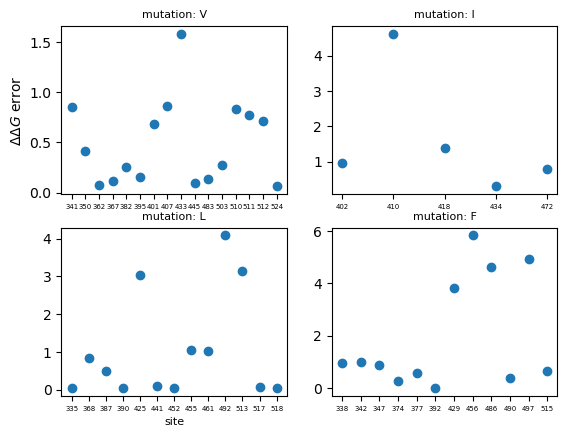

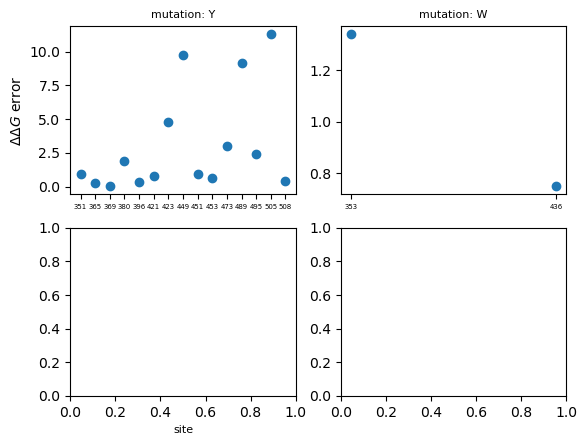

In [164]:
# fig, axs = plt.subplots(2,2)
c = 0
start = 0
stop = 4
error_stats = {}
for num_plots in range(len(list(sorted_dict.keys()))%4 ) :
   
    
    fig, axs = plt.subplots(2,2)
    c = 0
    
    for mut_name in list(sorted_dict.keys())[start:stop]:
        #plt.figure()
        #plt.subplot(2,2,i)
        j = c%2
        i= c//2
        
        mut_site_val =df_exp_data.iloc[idx]["bind_avg"].to_numpy()[sorted_dict[mut_name][0]]
        site_error = np.abs(mut_site_val - num_66[sorted_dict[mut_name][0]] )
        error_stats[mut_name] = np.mean(site_error), np.std(site_error)
        
        axs[i,j].scatter(sorted_dict[mut_name][1], site_error)
        axs[i,j].set_title(f"mutation: {mut_name}", fontsize=8)
        axs[i,j].tick_params(axis="x", labelsize=5)
        #plt.xlabel("site")
        c= c+1 
    #axs.tick_params(axis="x", labelsize=5)
    plt.tight_layout
    axs[1,0].set_xlabel("site", fontsize= 8)
    axs[0,0].set_ylabel("$\Delta \Delta G}$ error")
    
    start = stop
    stop = min( (stop+4, len(list(sorted_dict.keys()))))

Text(0, 0.5, '$\\Delta \\Delta G}$ error')

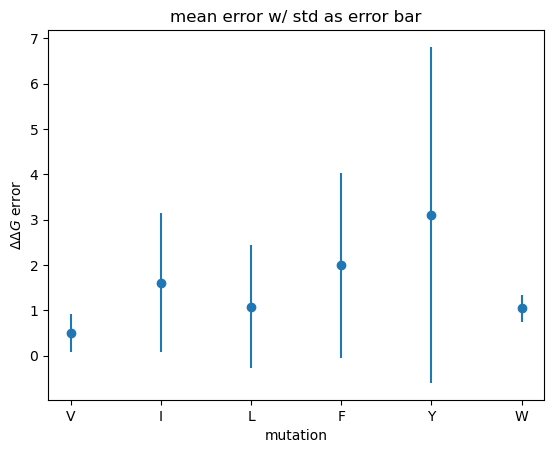

In [188]:
#error_stats
# plt.scatter(list(error_stats.keys()), \
#     [mean [0] for mean in list(error_stats.values())] ) 
plt.errorbar(list(error_stats.keys()), \
    [mean [0] for mean in list(error_stats.values())],
    yerr=[mean [1] for mean in list(error_stats.values())],
    fmt="o")
plt.title("mean error w/ std as error bar")
plt.xlabel("mutation")
plt.ylabel("$\Delta \Delta G}$ error")